# Agrupamento + $k$-means

Fontes da aula de hoje:
1. Notas de aula do professor Mark Crovella (https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science)
2. Capítulo 13 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

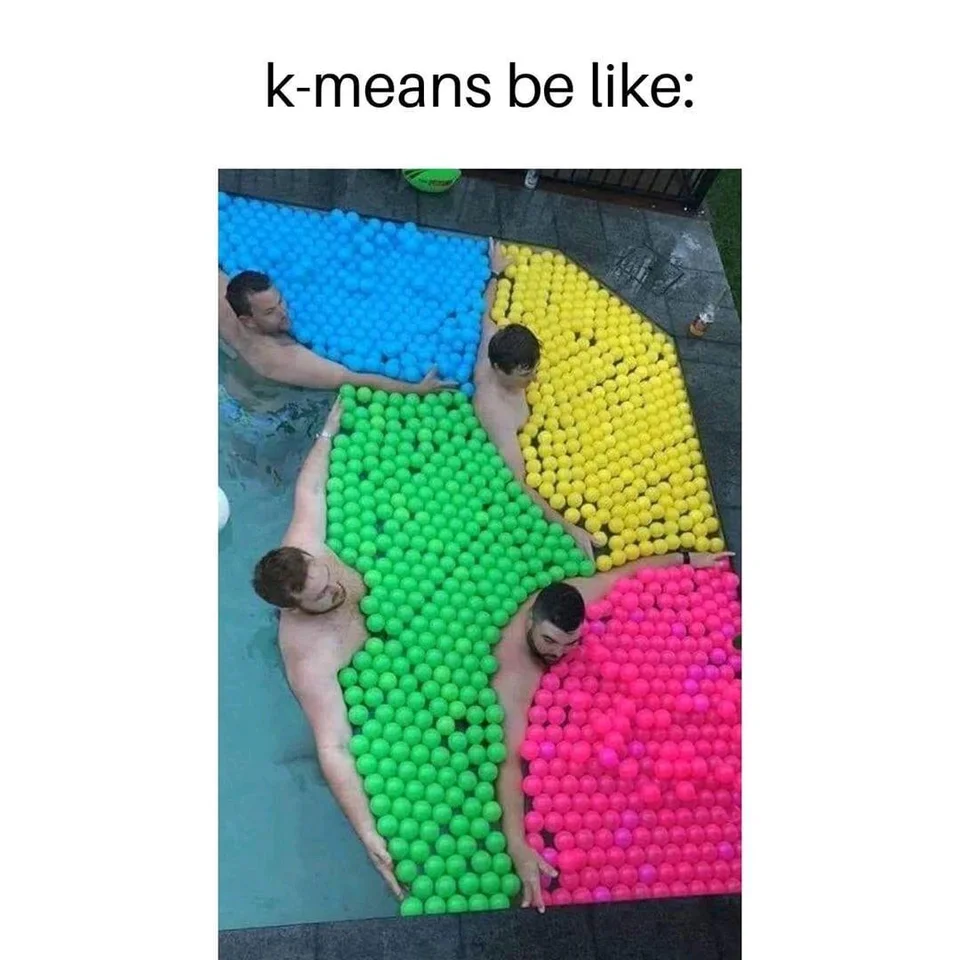

Fonte da figura: https://www.reddit.com/r/datascience/comments/d6buto/kmeans_be_like_mine_mine_mine/

# O problema de agrupamento

Dada uma coleção de objetos $X = \{x_1, x_2, \dots, x_n\}$, o objetivo é dividir os elementos de $X$ em grupos de forma que:
1. Elementos do mesmo grupo **sejam** "similares"
2. Elementos de grupos diferentes **não sejam** "similares"

Dentro de aprendizado de máquina, o problema de agrupamento está na categoria de **aprendizado não supervisionado**. Essa denominação é dada pois o objetivo é aprender a partir de dados não rotulados.

## Agrupamento é um problema difícil

### Exemplo I

Considere o conjunto de animais descrito abaixo. Como podemos dividir $X$ em grupos de forma a atender a "definição" acima?

In [ ]:
X = {'baleia', 'tubarão', 'humano', 'morcego', 'pinguim', 'papagaio', 'ornitorrinco', 'jacaré'}
X

{'baleia',
 'humano',
 'jacaré',
 'morcego',
 'ornitorrinco',
 'papagaio',
 'pinguim',
 'tubarão'}

Veja que a pergunta acima é extremamente subjetiva. Como vou dividir $X$ sem saber o que **similaridade** significa neste contexto?

Veja que há várias formas de definir similaridade aqui. Dependendo da definição, um agrupamento diferente será obtido.

1. Mamíferos e não mamíferos
2. Vive na água, vive na terra ou ambos
3. Voa?
4. Bota ovo?
5. Tem pena?

O conceito de **similaridade** vem do domínio da aplicação!

Esse é um dos motivos de termos discutido várias funções de distâncias e métricas. Vocês precisam ter várias ferramentas à disposição!

### Exemplo II

Exemplo baseado na documentação da biblioteca ``scikit-learn`` (https://scikit-learn.org/stable/modules/clustering.html)

Cada figura descreve um conjunto de dados em duas dimensões. Se fôssemos agrupar os dados abaixo, **quantos grupos teríamos em cada situação?**

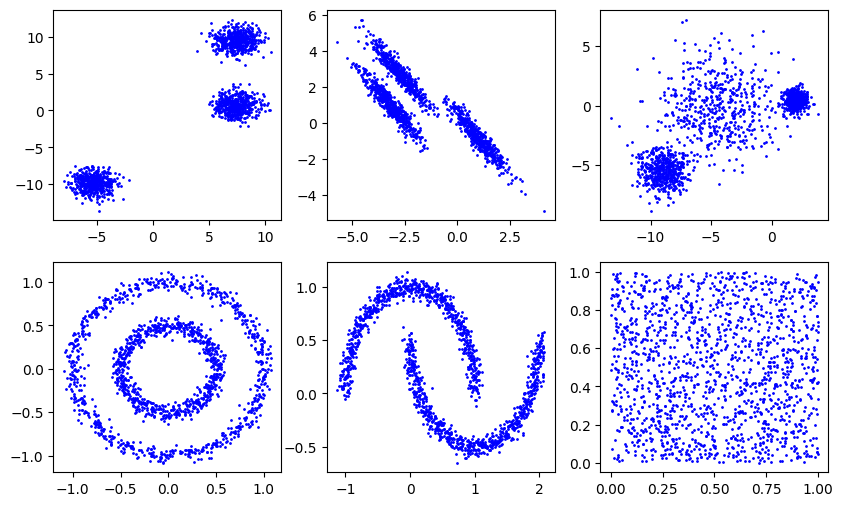

In [ ]:
#@title
import numpy as np
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
n_samples = 1500

# circles
noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5,
                                         noise=.05)

# moons
noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)

# blobs
blobs, _ = datasets.make_blobs(n_samples=n_samples, random_state=8)

# no structure
no_structure = np.random.rand(n_samples, 2)

# elipses
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# blobs with varied variances
varied, _ = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

def plot_figure_example(color):
  f, axarr = plt.subplots(2, 3, figsize=(10, 6))
  axarr[0, 0].scatter(blobs[:, 0], blobs[:, 1], s = 1, c = color[0])
  axarr[0, 1].scatter(aniso[:, 0], aniso[:, 1], s = 1, c = color[1])
  axarr[0, 2].scatter(varied[:, 0], varied[:, 1], s = 1, c = color[2])
  axarr[1, 0].scatter(noisy_circles[:, 0], noisy_circles[:, 1], s = 1,
                      c = color[3])
  axarr[1, 1].scatter(noisy_moons[:, 0], noisy_moons[:, 1], s = 1, c = color[4])
  axarr[1, 2].scatter(no_structure[:, 0], no_structure[:, 1], s = 1,
                      c = color[5])

plot_figure_example([["blue"] for _ in range(6)])

### Até mesmo a definição...

Até a definição (mais geral) que dei para o problema de agrupamento é subjetiva.

Dependendo da instância de problema de agrupamento, teremos uma definição diferente.

Nessa disciplina, veremos alguns paradigmas diferentes de agrupamento.

# $k$-means

## Intuição

Dado o conjunto de pontos abaixo, se você pudesse escolher **três** pontos para sumarizar o conjunto de dados, aonde você colocaria cada um deles?

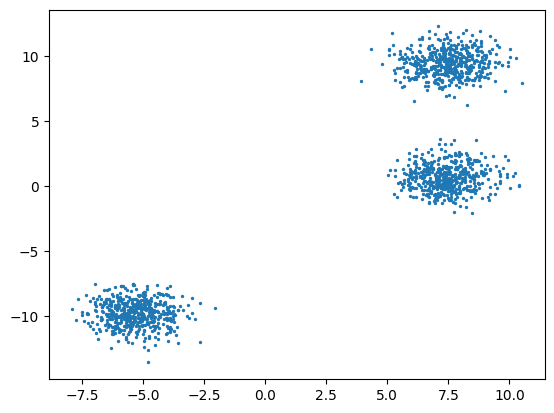

In [ ]:
#@title
_ = plt.scatter(blobs[:, 0], blobs[:, 1], s = 2)

Faz sentido pensar que uma boa escolha seria colocar um ponto no centro de cada "nuvem" de pontos.

## Formalização do Problema

### Versão I

Dada uma matriz $\mathbf{X} \in \mathbb{R}^{n \times d}$, cujas linhas são denotadas por $\mathbf{x}_1, \dots, \mathbf{x}_n$, e um inteiro $k$, o objetivo é encontrar $k$ pontos, $\mathbf{c}_1, \dots, \mathbf{c}_k$, de forma que a seguinte quantidade seja minimizada:

\begin{equation}
\sum_{i = 1}^n \min_{1 \le j \le k} ||\mathbf{x}_i - \mathbf{c}_j||_2^2
\end{equation}

### Versão II

Pode-se mostrar que a definição acima é equivalente à formulação apresentada abaixo.

Considere o conjunto $X = \{\mathbf{x}_1, \dots, \mathbf{x}_n\}$ onde $\mathbf{x}_i \in \mathbb{R}^d$ e um inteiro $k$.

O objetivo é encontrar:
- $k$ pontos $\mathbf{c}_1, \dots, \mathbf{c}_k$
- uma partição de $X$ em $k$ conjuntos, $X_1, \dots, X_k$

de forma que
$$\sum_{j=1}^k \sum_{\mathbf{x} \in X_j} \Vert \mathbf{x} - \mathbf{c}_j \Vert^2_2 $$
seja mínima.

De acordo com essa definição:
1. Os grupos obtidos são $X_1, \dots, X_k$
2. $\mathbf{c}_j$ é dito ser o representante (ou **centroide**) do grupo $X_j$.

### Versão III

Pode-se mostrar que as definições acima são equivalentes à formulação apresentada abaixo.

Considere o conjunto $X = \{\mathbf{x}_1, \dots, \mathbf{x}_n\}$ onde $\mathbf{x}_i \in \mathbb{R}^d$ e um inteiro $k$.

O objetivo é encontrar
- uma partição de $X$ em $k$ conjuntos, $X_1, \dots, X_k$

de forma que
$$\sum_{j=1}^k \sum_{\mathbf{x} \in X_j} \Vert \mathbf{x} - \bar{\mathbf{x}}_j \Vert^2_2 $$
seja mínima, onde $\bar{\mathbf{x}}_j$ é a média dos pontos pertencentes ao grupo $X_j$.

De acordo com essa definição:
1. Os grupos obtidos são $X_1, \dots, X_k$
2. $\bar{\mathbf{x}}_j$ é dito ser o representante (ou **centroide**) do grupo $X_j$.

O fato de o centroide de cada grupo ser a média dos elementos do grupo inspira o nome do problema, **$k$-means**.

## Complexidade

1. Se $k = 1$ ou $k = n$, o problema é fácil! Por quê?
2. Se $d = 1$, ou seja, se estamos interessados em agrupar pontos na reta real, há um algoritmo eficiente (polinomial) para resolver o problema de forma exata.
3. No caso geral, pode-se mostrar que $k$-means é **NP-difícil**.

## Algoritmo

Apesar da complexidade, há uma heurística (conjunto de heurísticas) para o problema acima.

1. "Chute" de alguma forma os $k$ centroides
2. Repita os seguintes passos até que haja convergência
    * Associe cada ponto de $X$ ao centroide mais próximo, formando os grupos $X_1, \dots, X_k$
    * atualize o centroide de cada grupo como sendo a média dos pontos do grupo

**Observações:**
1. O passo (1) é particularmente problemático. Uma inicialização ruim pode levar o algoritmo a uma péssima separação de grupos. Uma heuristica muito utilizada (e padrão na ``scikit-learn``) é chamada de $k$-means++.
2. O algoritmo acima foi proposto por Lloyd, em 1957. Por isso, é conhecido como algoritmo de Lloyd.
3. Muitas vezes, o algoritmo acima é chamado de $k$-means. Apesar de essa ser uma denominação muito popular (e presente em vários livros), $k$-means é o nome do problema.

## Com a biblioteca *Scikit-learn*

In [ ]:
from sklearn.cluster import KMeans

# Fornecendo os parâmetros do modelo
kmeans = KMeans(n_clusters = 3)

# ajustando o modelo
kmeans.fit(blobs)

# obtendo o identificador de grupo de cada ponto
y_kmeans = kmeans.predict(blobs)

# cada ponto é mapeado para um número, correspondente ao cluster
# ao qual foi associado
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

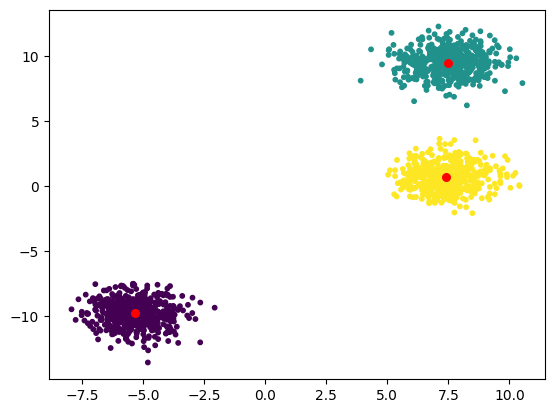

In [ ]:
# Com esses números, podemos associar cada grupo a uma cor
centers = kmeans.cluster_centers_
_ = plt.scatter(blobs[:, 0], blobs[:, 1], c=y_kmeans, s=10, cmap='viridis')
_ = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=30);

## Como escolher $k$?

O valor de $k$ tem grande impacto no valor da função objetivo. Se $k = n$, cada grupo é um único ponto, assim o modelo representa os dados perfeitamente. Por outro lado, se $k = 1$, então o erro é grande.

$k$ é um exemplo de **hiperparâmetro**. Informalmente, um hiperparâmetro é uma quantidade importante para o algoritmo, mas que deve ser fornecida pelo usuário.

O processo de escolha de hiperparâmetros é de extrema importância em aprendizado de máquina.

É uma tarefa particularmente complicada em aprendizado não supervisionado (e.g., agrupamento). É uma tarefa mais simples (do ponto de vista procedimental) em aprendizado supervisionado (cenas das próximas aulas).

No caso do $k$-means, uma abordagem comum/clássica é recorrer à heurística do "cotovelo" (em algum lugares, "joelho").

Para isso, vamos observar o **erro** do agrupamento (que é o valor da função objetivo) para vários valores de $k$.

No caso do exemplo acima, veja que o erro para de cair significativamente para $k \ge 3$. Esse tipo de comportamento sugere que $k = 3$ é uma boa escolha.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

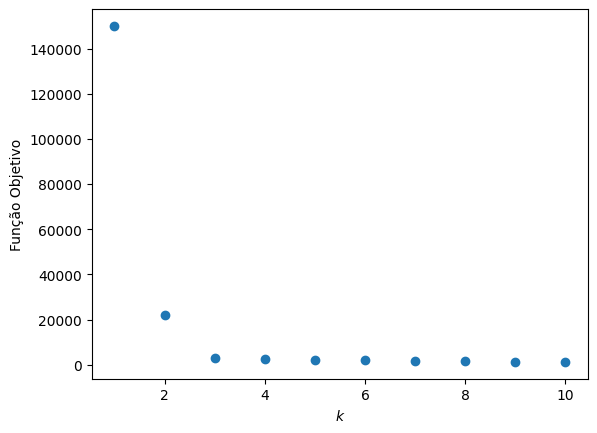

In [ ]:
inertia = []
for i in range(1, 11):
  km = cluster.KMeans(n_clusters = i)
  km.fit(blobs)
  inertia.append(km.inertia_)

plt.scatter(range(1, 11), inertia)
_ = plt.ylabel("Função Objetivo")
_ = plt.xlabel(r"$k$")

## Saída do algoritmo para os exemplos anteriores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

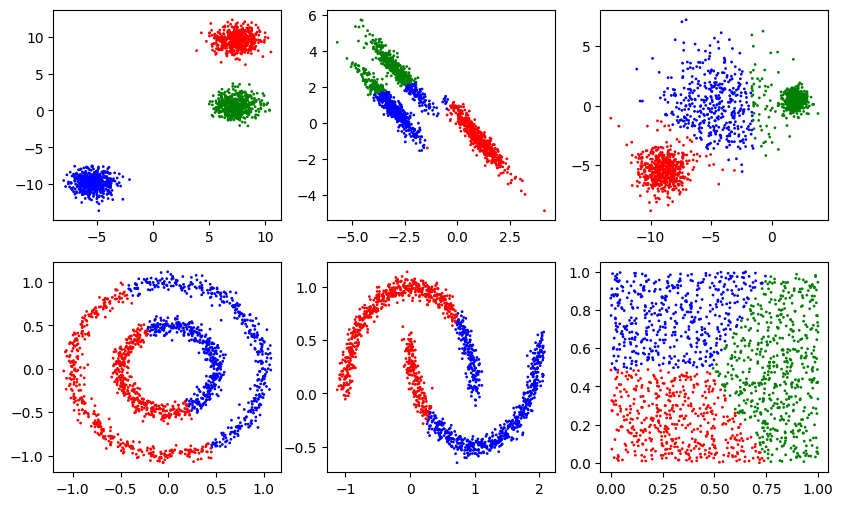

In [ ]:
#@title
def exec_model(dataset, model, params):
  labels = []
  if model == cluster.DBSCAN:
    for idx, param in enumerate(params):
      km = model(eps = param[0], min_samples = param[1])
      km.fit(dataset[idx])
      labels.append(km.labels_)
  elif model == cluster.SpectralClustering:
    for idx, param in enumerate(params):
      km = model(param, affinity='nearest_neighbors')
      km.fit(dataset[idx])
      labels.append(km.labels_)
  else:
    for idx, param in enumerate(params):
      km = model(param)
      km.fit(dataset[idx])
      labels.append(km.labels_)
  color = "blue red green yellow black purple".split()
  c = []
  for label in labels:
    c.append([color[w] for w in label])
  return c

dataset = [blobs, aniso, varied, noisy_circles, noisy_moons, no_structure]
n_groups = [3, 3, 3, 2, 2, 3]
colors = exec_model(dataset, cluster.KMeans, n_groups)
plot_figure_example(colors)

## Limitações

Os exemplos acima mostram claramente que o $k$-means não é o problema ideal para modelar todo tipo de situação.

1. $k$-means tenta encontrar grupos esféricos
2. $k$-means tenta encontrar grupos de tamanhos iguais

Além disso, $k$-means é sensível à diferença de ordens de grandezas das *features*. Assim, se *features* diferentes tiverem unidades de medidas diferentes ou ordens de grandezas muito distintas, é importante normalizar/padronizar os dados. **Por quê?**

Considere os dois vetores abaixo:
- $\mathbf{x} = (27, 75000, 0)^T$
- $\mathbf{y} = (45, 100000, 1)^T$

Suponha que as features representem: **idade**, **salário anual** e **indicador de ensino superior**.

Veja que ao calcular $\Vert \mathbf{x} - \mathbf{y} \Vert_2$, a distância será muito influenciada pela *feature* salário. De fato, mudanças no indicador de ensino superior terão um efeito quase nulo na distância.


Uma forma comum de lidar com esse tipo de situação é utilizando *feature scaling*.

A ideia básica é transformar cada *feature* separadamente, de forma que todas as *features* assumam valores nos mesmos intervalos (aproximadamente).

Uma escolha comum, no caso do $k$*-means* é:

1. Deslocar os valores de cada *feature*, subtraindo dos valores a média computada sobre todos os valores da *feature*. **Com isso, a coluna referente à *feature* passa a ter média zero!**

2. Modificar a escala da *feature*, dividindo todos os valores pelo desvio padrão computado sobre todos os valores da *feature*. **Com isso, a coluna referente à *feature* passa a ter desvio padrão 1!**

### Vejamos um exemplo

Considere o conjunto de dados `wine`, que já utilizamos na Aula de PCA.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

X, y = load_wine(return_X_y=True, as_frame = True);
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Observe que as colunas têm escalas diferentes. Por exemplo:
- A coluna `magnesium` assume valores no intervalo de **centenas**;
- A coluna `nonflavanoid_phenols` assume valores no intervalo de **décimos**.

#### Aplicando $k$-means nos dados originais

Vamos considerar $k = 3$.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

Agora, vamos utilizar PCA para visualizar o resultado do agrupamento.

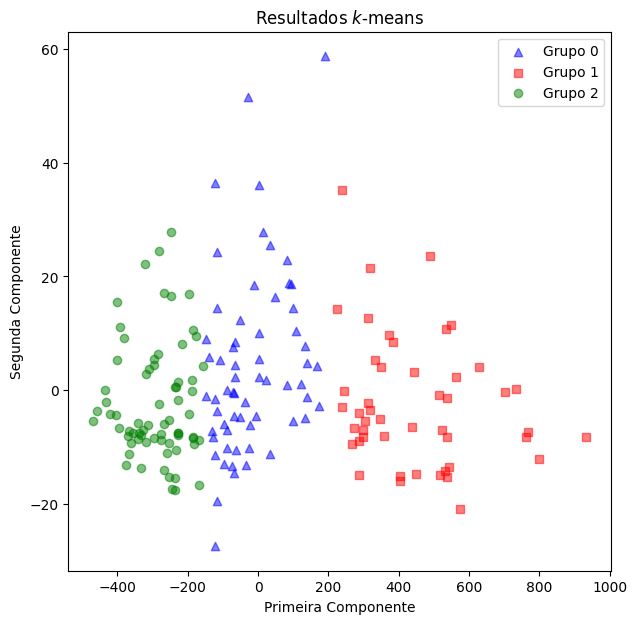

In [ ]:
#@title
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)

plt.figure(figsize=(7, 7))
for l, c, m in zip(range(0, 3), ("blue", "red", "green"), ("^", "s", "o")):
  plt.scatter(X2[y_kmeans == l, 0], X2[y_kmeans == l, 1], color=c, label="Grupo %s" % l, alpha=0.5, marker=m)
plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');
plt.title(r'Resultados $k$-means');

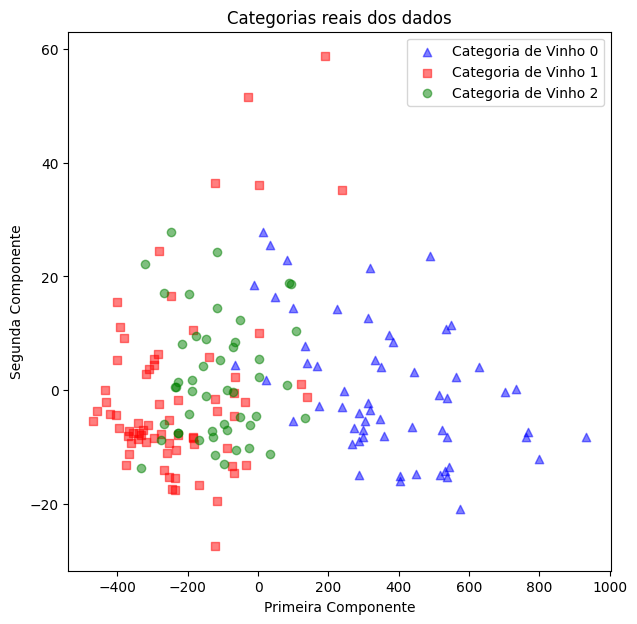

In [ ]:
#@title

plt.figure(figsize=(7, 7))
for l, c, m in zip(range(0, 3), ("blue", "red", "green"), ("^", "s", "o")):
  plt.scatter(X2[y == l, 0], X2[y == l, 1], color=c, label="Categoria de Vinho %s" % l, alpha=0.5, marker=m)
plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');
plt.title(r'Categorias reais dos dados');

#### Aplicando $k$-means nos dados transformados

In [ ]:
from sklearn.preprocessing import StandardScaler

Z = X.copy()
scaler = StandardScaler(with_mean=True, with_std=True)

# Colunas de Z terão média 0 e desvio padrão 1
Z[Z.columns] = scaler.fit_transform(Z)
Z.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(Z)
y_kmeans = kmeans.predict(Z)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

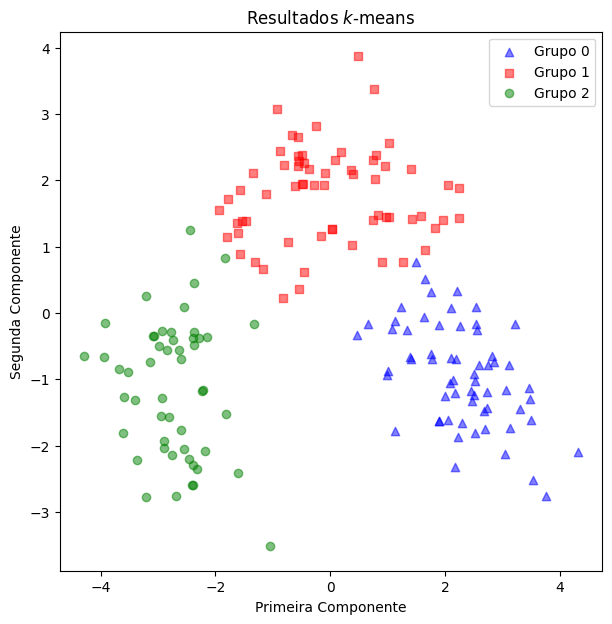

In [ ]:
#@title
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
X2 = pca.fit_transform(Z)

plt.figure(figsize=(7, 7))
for l, c, m in zip(range(0, 3), ("blue", "red", "green"), ("^", "s", "o")):
  plt.scatter(X2[y_kmeans == l, 0], X2[y_kmeans == l, 1], color=c, label="Grupo %s" % l, alpha=0.5, marker=m)
plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');
plt.title(r'Resultados $k$-means');

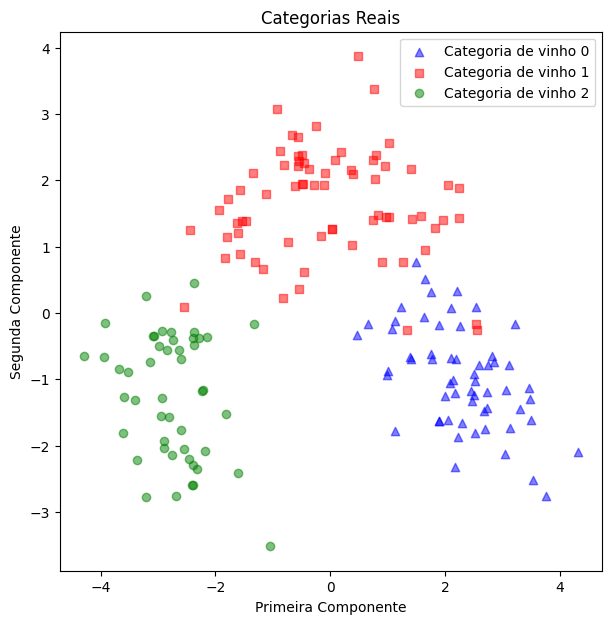

In [ ]:
#@title
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for l, c, m in zip(range(0, 3), ("blue", "red", "green"), ("^", "s", "o")):
  plt.scatter(X2[y == l, 0], X2[y == l, 1], color=c, label="Categoria de vinho %s" % l, alpha=0.5, marker=m)
plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');
plt.title(r'Categorias Reais');

## Para encerrar: usando $k$-means para compressão de imagens

Exemplo baseado em https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/

### Passo 1: obtendo uma imagem

In [ ]:
!wget https://media.geeksforgeeks.org/wp-content/uploads/20190513003742/bird_small.png

--2023-10-04 17:06:07--  https://media.geeksforgeeks.org/wp-content/uploads/20190513003742/bird_small.png
Resolving media.geeksforgeeks.org (media.geeksforgeeks.org)... 13.33.21.119, 13.33.21.80, 13.33.21.3, ...
Connecting to media.geeksforgeeks.org (media.geeksforgeeks.org)|13.33.21.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33031 (32K) [image/png]
Saving to: ‘bird_small.png.2’

bird_small.png.2    100%[===================>]  32.26K  --.-KB/s    in 0.03s   

2023-10-04 17:06:07 (1.17 MB/s) - ‘bird_small.png.2’ saved [33031/33031]



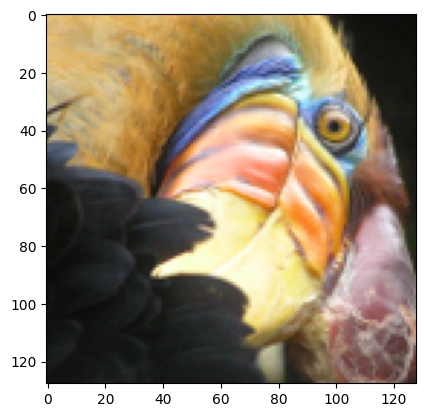

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


img = cv2.imread('bird_small.png')

# Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Scaling the image so that the values are in the range of 0 to 1
img = img / 255.0

plt.imshow(img);

### Passo 2: aplicando $k$-means nos pixels da imagen!

Uma imagen colorida pode ser vista como um array de três dimensões.

In [ ]:
img

array([[[0.85882353, 0.70588235, 0.40392157],
        [0.90196078, 0.7254902 , 0.45490196],
        [0.88627451, 0.72941176, 0.43137255],
        ...,
        [0.05490196, 0.05882353, 0.05098039],
        [0.05098039, 0.05882353, 0.04705882],
        [0.04705882, 0.05490196, 0.04705882]],

       [[0.90196078, 0.75686275, 0.46666667],
        [0.87843137, 0.75294118, 0.47058824],
        [0.88627451, 0.75294118, 0.48627451],
        ...,
        [0.0627451 , 0.0627451 , 0.05098039],
        [0.05490196, 0.05882353, 0.03921569],
        [0.04313725, 0.05490196, 0.03529412]],

       [[0.89411765, 0.74901961, 0.48235294],
        [0.89411765, 0.74901961, 0.4745098 ],
        [0.8627451 , 0.7254902 , 0.4627451 ],
        ...,
        [0.05490196, 0.0627451 , 0.05098039],
        [0.05098039, 0.05098039, 0.04313725],
        [0.04313725, 0.05882353, 0.03921569]],

       ...,

       [[0.05882353, 0.07058824, 0.0627451 ],
        [0.07058824, 0.08235294, 0.07058824],
        [0.07058824, 0

### Passo 3: Transformando a imagem em um vetor de pixels

In [ ]:
points = img.reshape((-1, img.shape[2]))
m, n = points.shape

m, n

(16384, 3)

### Passo 4: Agrupando os pontos com o $k$-means

In [ ]:
nClusters = 10

kmeans = KMeans(n_clusters = nClusters)
kmeans.fit(points)
y_kmeans = kmeans.predict(points)

y_kmeans
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Passo 5: Realizando a compressão (com perda)

A ideia é que cada pixel é substituído pelo centroide do grupo a que pertence.

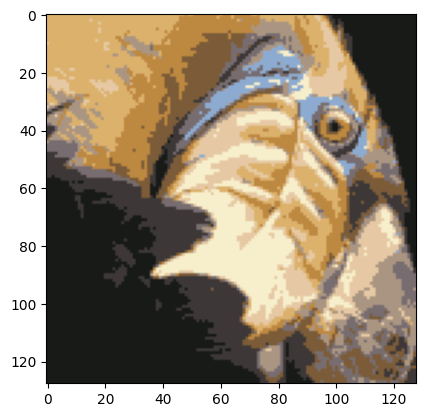

In [ ]:
recovered = centroids[y_kmeans.astype(int), :]

# voltando os pontos para o formato da imagem
recovered = recovered.reshape(img.shape)

# visualizando a imagem
plt.imshow(recovered)
plt.show()

# What is next?

- Como avaliar se um agrupamento é bom?
- Variações do problema:
  - $k$-medoids (https://en.wikipedia.org/wiki/K-medoids), um elemento do grupo deve ser o representante do grupo.
  - $k$-center (https://en.wikipedia.org/wiki/Metric_k-center), a distância máxima entre um elemento do grupo e o representante do grupo deve ser minimizada.